<a href="https://colab.research.google.com/github/seong1542/Instagram_Account_detection/blob/master/%EC%9D%B8%EC%8A%A4%ED%83%80%EA%B7%B8%EB%9E%A8_%EB%B2%94%EC%A3%BC%ED%98%95_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [62]:
filepath='/content/gdrive/My Drive/'

In [63]:
train = pd.read_csv(filepath+'instagram_detection.csv')
print(train.shape)

(10104, 17)


In [64]:
train.head()

,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional,#fake
0,1,11,0,31,0,0,117,1,0,123,288,85,1,0,0,1,0
1,1,11,0,5,0,0,91,1,0,2654,88000,541,1,1,0,1,0
2,1,8,3,22,3,0,103,1,0,4642,32000,275,1,0,3,0,0
3,1,10,2,3,0,0,55,1,0,305,653,1368,1,2,0,0,0
4,0,12,2,12,2,1,0,0,0,0,12,19,0,0,0,0,0


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   #profile_pic      10104 non-null  int64
 1   #id_len           10104 non-null  int64
 2   #num_in_id        10104 non-null  int64
 3   #name_len         10104 non-null  int64
 4   #num_in_name      10104 non-null  int64
 5   #name==id         10104 non-null  int64
 6   #itro_len         10104 non-null  int64
 7   #url              10104 non-null  int64
 8   #private          10104 non-null  int64
 9   #post             10104 non-null  int64
 10  #follower_counts  10104 non-null  int64
 11  #follows_counts   10104 non-null  int64
 12  #highlight        10104 non-null  int64
 13  #account_tag      10104 non-null  int64
 14  #hash_tag         10104 non-null  int64
 15  #professional     10104 non-null  int64
 16  #fake             10104 non-null  int64
dtypes: int64(17)
memory usage: 1.3 

In [66]:
# 프로필 유무, 이름과 아이디가 같은가, url 유무, 비공개 유무, 프로페셔널 계정 유무, 가짜계정 유무는 범주형으로 설정
train['#profile_pic'] = train['#profile_pic'].astype('category')
train['#name==id'] = train['#name==id'].astype('category')
train['#url'] = train['#url'].astype('category')
train['#private'] = train['#private'].astype('category')
train['#professional'] = train['#professional'].astype('category')
train['#fake'] = train['#fake'].astype('category')
train['#highlight'] = train['#highlight'].astype('category')

In [67]:
train.head()

,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional,#fake
0,1,11,0,31,0,0,117,1,0,123,288,85,1,0,0,1,0
1,1,11,0,5,0,0,91,1,0,2654,88000,541,1,1,0,1,0
2,1,8,3,22,3,0,103,1,0,4642,32000,275,1,0,3,0,0
3,1,10,2,3,0,0,55,1,0,305,653,1368,1,2,0,0,0
4,0,12,2,12,2,1,0,0,0,0,12,19,0,0,0,0,0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   #profile_pic      10104 non-null  category
 1   #id_len           10104 non-null  int64   
 2   #num_in_id        10104 non-null  int64   
 3   #name_len         10104 non-null  int64   
 4   #num_in_name      10104 non-null  int64   
 5   #name==id         10104 non-null  category
 6   #itro_len         10104 non-null  int64   
 7   #url              10104 non-null  category
 8   #private          10104 non-null  category
 9   #post             10104 non-null  int64   
 10  #follower_counts  10104 non-null  int64   
 11  #follows_counts   10104 non-null  int64   
 12  #highlight        10104 non-null  category
 13  #account_tag      10104 non-null  int64   
 14  #hash_tag         10104 non-null  int64   
 15  #professional     10104 non-null  category
 16  #fake             1010

In [69]:
train.nunique() # 혹시 0과 1 만 들어있어야 할 곳에 다른 것이 들어 갔는지 확인

#profile_pic           2
#id_len               31
#num_in_id            15
#name_len             39
#num_in_name          15
#name==id              3
#itro_len            167
#url                   2
#private               2
#post                747
#follower_counts    1891
#follows_counts     2836
#highlight             2
#account_tag          11
#hash_tag             21
#professional          2
#fake                  2
dtype: int64

In [70]:
train.head(10)

,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional,#fake
0,1,11,0,31,0,0,117,1,0,123,288,85,1,0,0,1,0
1,1,11,0,5,0,0,91,1,0,2654,88000,541,1,1,0,1,0
2,1,8,3,22,3,0,103,1,0,4642,32000,275,1,0,3,0,0
3,1,10,2,3,0,0,55,1,0,305,653,1368,1,2,0,0,0
4,0,12,2,12,2,1,0,0,0,0,12,19,0,0,0,0,0
5,1,11,0,11,0,1,0,0,0,15,36,51,1,0,0,0,0
6,1,11,0,11,0,1,0,0,0,21,216,217,1,0,0,0,0
7,1,9,0,3,0,0,0,0,0,1,18,20,0,0,0,0,0
8,1,9,0,7,0,0,33,0,0,6,23,26,0,0,0,0,0
9,1,9,0,1,0,0,0,0,0,0,20,22,0,0,0,0,0


In [71]:
# train 셋에 있는 fake는 y에 저장
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)

In [72]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: #fake, dtype: category
Categories (2, int64): [0, 1]

In [73]:
X_train.head()

,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional
0,1,11,0,31,0,0,117,1,0,123,288,85,1,0,0,1
1,1,11,0,5,0,0,91,1,0,2654,88000,541,1,1,0,1
2,1,8,3,22,3,0,103,1,0,4642,32000,275,1,0,3,0
3,1,10,2,3,0,0,55,1,0,305,653,1368,1,2,0,0
4,0,12,2,12,2,1,0,0,0,0,12,19,0,0,0,0


Text(0.5, 1.0, 'Correlation Heatmap Between Features')

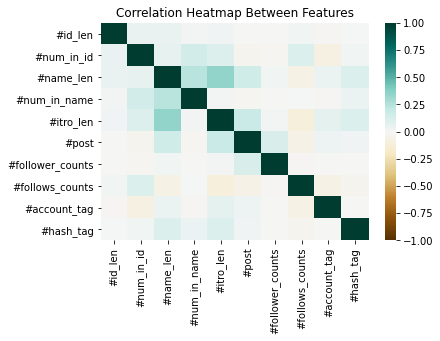

In [74]:
data_corr = X_train.corr(method='pearson')
axes = sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='BrBG')
axes.set_title('Correlation Heatmap Between Features')

In [75]:
# 진짜 계정과 가짜 계정이 총 몇 개씩 있는지 확인 (False = 진짜 계정 , True = 가짜 계정)
unique, freq = np.unique(y_train, return_counts=True)
for i, j in zip(unique, freq):
  print('Label : ',i, ', Frequency : ', j)

Label :  0 , Frequency :  5052
Label :  1 , Frequency :  5052


In [76]:
# train과 validation set은 8:2로 나눔
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
valid_score = rf.score(X_valid, y_valid)
print('RandomForest Train_Accuracy : {}'.format(train_score))
print('RandomForest Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
train_score = gb.score(X_train, y_train)
valid_score = gb.score(X_valid, y_valid)
print('GradientBoosting Train_Accuracy : {}'.format(train_score))
print('GradientBoosting Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty = 'l2',solver='newton-cg',random_state=0, max_iter=600)
lg.fit(X_train,y_train)
train_score = lg.score(X_train,y_train)
valid_score = lg.score(X_valid,y_valid)
print('Logistic Train_Accuracy : {}'.format(train_score))
print('Logistic Valid_Accuracy : {}'.format(valid_score))
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
train_score = dt.score(X_train,y_train)
valid_score=dt.score(X_valid,y_valid)
print('DecisionTree Train_Accuracy : {}'.format(train_score))
print('DecisionTree Valid_Accuracy : {}'.format(valid_score))


RandomForest Train_Accuracy : 1.0
RandomForest Valid_Accuracy : 0.9703117268678871

GradientBoosting Train_Accuracy : 0.9777310404552765
GradientBoosting Valid_Accuracy : 0.9703117268678871

Logistic Train_Accuracy : 0.8693554373376222
Logistic Valid_Accuracy : 0.8703612073231074

DecisionTree Train_Accuracy : 1.0
DecisionTree Valid_Accuracy : 0.9539831766452251


In [78]:
#XGBoost 시도해보니, category는 안받아줌 -> bool으로 시도해봄.
train['#profile_pic'] = train['#profile_pic'].astype(bool)
train['#name==id'] = train['#name==id'].astype(bool)
train['#url'] = train['#url'].astype(bool)
train['#private'] = train['#private'].astype(bool)
train['#professional'] = train['#professional'].astype(bool)
train['#fake'] = train['#fake'].astype(bool)
train['#highlight'] = train['#highlight'].astype(bool)

Text(0.5, 1.0, 'Correlation Heatmap Between Features')

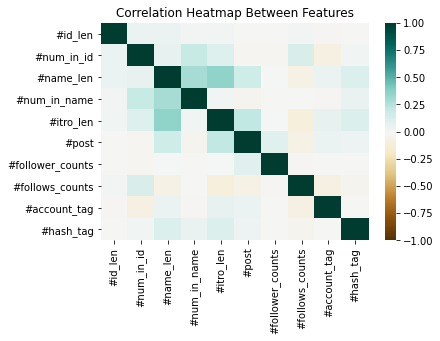

In [79]:
data_corr = X_train.corr(method='pearson')
axes = sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='BrBG')
axes.set_title('Correlation Heatmap Between Features')

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   #profile_pic      10104 non-null  bool 
 1   #id_len           10104 non-null  int64
 2   #num_in_id        10104 non-null  int64
 3   #name_len         10104 non-null  int64
 4   #num_in_name      10104 non-null  int64
 5   #name==id         10104 non-null  bool 
 6   #itro_len         10104 non-null  int64
 7   #url              10104 non-null  bool 
 8   #private          10104 non-null  bool 
 9   #post             10104 non-null  int64
 10  #follower_counts  10104 non-null  int64
 11  #follows_counts   10104 non-null  int64
 12  #highlight        10104 non-null  bool 
 13  #account_tag      10104 non-null  int64
 14  #hash_tag         10104 non-null  int64
 15  #professional     10104 non-null  bool 
 16  #fake             10104 non-null  bool 
dtypes: bool(7), int64(10)
memory us

In [81]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)

In [82]:
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)


In [83]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
train_score = xgb_model.score(X_train,y_train)
valid_score = xgb_model.score(X_valid,y_valid)
print('XGBoost Train_Accuracy : {}'.format(train_score))
print('XGBoost Valid_Accuracy : {}'.format(valid_score))
print()

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
train_score =lgb_model.score(X_train,y_train)
valid_score= lgb_model.score(X_valid,y_valid)
print('LGBM Train_Accuracy : {}'.format(train_score))
print('LGBM Valid_Accuracy : {}'.format(valid_score))
print()
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
valid_score = rf.score(X_valid, y_valid)
print('RandomForest Train_Accuracy : {}'.format(train_score))
print('RandomForest Valid_Accuracy : {}'.format(valid_score))

XGBoost Train_Accuracy : 0.9764938760361253
XGBoost Valid_Accuracy : 0.9703117268678871

LGBM Train_Accuracy : 0.9978968204874428
LGBM Valid_Accuracy : 0.9722909450766947

RandomForest Train_Accuracy : 1.0
RandomForest Valid_Accuracy : 0.9678377041068777


# int형으로만 해놓고 돌리면?

In [84]:
train= pd.read_csv(filepath+'instagram_detection.csv')  # int형으로 그냥 두고 돌릴 때 변화가 있는지 확인
print(train.shape)

(10104, 17)


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   #profile_pic      10104 non-null  int64
 1   #id_len           10104 non-null  int64
 2   #num_in_id        10104 non-null  int64
 3   #name_len         10104 non-null  int64
 4   #num_in_name      10104 non-null  int64
 5   #name==id         10104 non-null  int64
 6   #itro_len         10104 non-null  int64
 7   #url              10104 non-null  int64
 8   #private          10104 non-null  int64
 9   #post             10104 non-null  int64
 10  #follower_counts  10104 non-null  int64
 11  #follows_counts   10104 non-null  int64
 12  #highlight        10104 non-null  int64
 13  #account_tag      10104 non-null  int64
 14  #hash_tag         10104 non-null  int64
 15  #professional     10104 non-null  int64
 16  #fake             10104 non-null  int64
dtypes: int64(17)
memory usage: 1.3 

Text(0.5, 1.0, 'Correlation Heatmap Between Features')

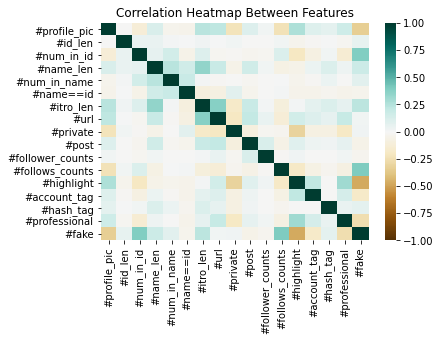

In [86]:
data_corr = train.corr(method='pearson')
axes = sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='BrBG')
axes.set_title('Correlation Heatmap Between Features')

In [87]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
valid_score = rf.score(X_valid, y_valid)
print('RandomForest Train_Accuracy : {}'.format(train_score))
print('RandomForest Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
train_score = gb.score(X_train, y_train)
valid_score = gb.score(X_valid, y_valid)
print('GradientBoosting Train_Accuracy : {}'.format(train_score))
print('GradientBoosting Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty = 'l2',solver='newton-cg',random_state=0, max_iter=600)
lg.fit(X_train,y_train)
train_score = lg.score(X_train,y_train)
valid_score = lg.score(X_valid,y_valid)
print('Logistic Train_Accuracy : {}'.format(train_score))
print('Logistic Valid_Accuracy : {}'.format(valid_score))
print()

import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
train_score = xgb_model.score(X_train,y_train)
valid_score = xgb_model.score(X_valid,y_valid)
print('XGBoost Train_Accuracy : {}'.format(train_score))
print('XGBoost Valid_Accuracy : {}'.format(valid_score))
print()

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
train_score =lgb_model.score(X_train,y_train)
valid_score= lgb_model.score(X_valid,y_valid)
print('LGBM Train_Accuracy : {}'.format(train_score))
print('LGBM Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
train_score = dt.score(X_train,y_train)
valid_score=dt.score(X_valid,y_valid)
print('DecisionTree Train_Accuracy : {}'.format(train_score))
print('DecisionTree Valid_Accuracy : {}'.format(valid_score))

RandomForest Train_Accuracy : 1.0
RandomForest Valid_Accuracy : 0.971301335972291

GradientBoosting Train_Accuracy : 0.9777310404552765
GradientBoosting Valid_Accuracy : 0.9703117268678871

Logistic Train_Accuracy : 0.8693554373376222
Logistic Valid_Accuracy : 0.8703612073231074

XGBoost Train_Accuracy : 0.9764938760361253
XGBoost Valid_Accuracy : 0.9703117268678871

LGBM Train_Accuracy : 0.9978968204874428
LGBM Valid_Accuracy : 0.9722909450766947

DecisionTree Train_Accuracy : 1.0
DecisionTree Valid_Accuracy : 0.9594260267194458


# 최대한 효율적인 방법 - RandomForest, GradientBoosting, LGBM
## (Train 정확도 높은 것, valid 정확도 높은 것 중 고려)

## **int형으로 돌릴 때**, *Randomforest*에서 정확도 올라감 (나머지는 변함X) 
## -> **int형으로 유지한 상태에서, optuna 사용해봄.**

In [89]:
!pip install optuna #옵튜나 설치

In [90]:
import optuna
from sklearn.metrics import log_loss
categorical_features = ['#profile_pic','#name==id','#url','#private','#highlight','#professional']
def objective(trial):
  params = {'objective':'binary', 
            'n_estimators' : trial.suggest_categorical('n_estimators', [300,500,800,1000]),
            'learning_rate' : trial.suggest_categorical('lerning_rate', [0.05,0.01,0.1]), 
            'max_depth' : trial.suggest_categorical('max_depth', [5,6,7,8]), 
            'max_features' : trial.suggest_categorical('max_features', [0.1,0.3,0.5,0.7]), 
            'min_samples_split' : trial.suggest_categorical('min_samples_split', [2,6]),
            'min_samples_leaf' : trial.suggest_categorical('min_samples_leaf', [2,6])
            }
  lgb_train = lgb.Dataset(X_train,y_train, categorical_feature = categorical_features)
  lgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train, categorical_feature = categorical_features)
  model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval],verbose_eval=10, num_boost_round=1000, early_stopping_rounds=100)
  y_pred_valid = model.predict(X_valid,num_iteration=model.best_iteration)
  score = log_loss(y_valid,y_pred_valid)
  return score

In [91]:
study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=40) #5회반복

print('Best score : '+str(study.best_trial.value))

[I 2021-06-02 19:09:06,590] A new study created in memory with name: no-name-4adf4577-5a54-4bc0-9425-4f748b6e1db1
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:07,717] Trial 0 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.411323	valid_1's binary_logloss: 0.413697
[20]	training's binary_logloss: 0.270566	valid_1's binary_logloss: 0.277387
[30]	training's binary_logloss: 0.193298	valid_1's binary_logloss: 0.204611
[40]	training's binary_logloss: 0.145922	valid_1's binary_logloss: 0.161338
[50]	training's binary_logloss: 0.116141	valid_1's binary_logloss: 0.135096
[60]	training's binary_logloss: 0.0963498	valid_1's binary_logloss: 0.118673
[70]	training's binary_logloss: 0.0816513	valid_1's binary_logloss: 0.106801
[80]	training's binary_logloss: 0.0710277	valid_1's binary_logloss: 0.0991108
[90]	training's binary_logloss: 0.0634895	valid_1's binary_logloss: 0.0944022
[100]	training's binary_logloss: 0.0574838	valid_1's binary_logloss: 0.0909468
[110]	training's binary_logloss: 0.052291	valid_1's binary_logloss: 0.0881219
[120]	training's binary_logloss: 0.0481254	valid_1's binary_logloss: 0.0868324
[130]	train

[I 2021-06-02 19:09:08,615] Trial 1 finished with value: 0.07976107606346014 and parameters: {'n_estimators': 300, 'lerning_rate': 0.05, 'max_depth': 6, 'max_features': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409857	valid_1's binary_logloss: 0.411575
[20]	training's binary_logloss: 0.267202	valid_1's binary_logloss: 0.273658
[30]	training's binary_logloss: 0.188147	valid_1's binary_logloss: 0.199805
[40]	training's binary_logloss: 0.140546	valid_1's binary_logloss: 0.156187
[50]	training's binary_logloss: 0.110349	valid_1's binary_logloss: 0.130895
[60]	training's binary_logloss: 0.0902005	valid_1's binary_logloss: 0.114351
[70]	training's binary_logloss: 0.0755908	valid_1's binary_logloss: 0.102603
[80]	training's binary_logloss: 0.0646585	valid_1's binary_logloss: 0.0947769
[90]	training's binary_logloss: 0.0565063	valid_1's binary_logloss: 0.0899954
[100]	training's binary_logloss: 0.0502482	valid_1's binary_logloss: 0.0871729
[110]	training's binary_logloss: 0.0449098	valid_1's binary_logloss: 0.0846616
[120]	training's binary_logloss: 0.0409557	valid_1's binary_logloss: 0.0829291
[130]	trai

[I 2021-06-02 19:09:09,538] Trial 2 finished with value: 0.07784917913434437 and parameters: {'n_estimators': 300, 'lerning_rate': 0.05, 'max_depth': 8, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.619899	valid_1's binary_logloss: 0.619961
[20]	training's binary_logloss: 0.558859	valid_1's binary_logloss: 0.559194
[30]	training's binary_logloss: 0.506427	valid_1's binary_logloss: 0.507173
[40]	training's binary_logloss: 0.46106	valid_1's binary_logloss: 0.462145
[50]	training's binary_logloss: 0.421733	valid_1's binary_logloss: 0.423367
[60]	training's binary_logloss: 0.387189	valid_1's binary_logloss: 0.38948
[70]	training's binary_logloss: 0.35632	valid_1's binary_logloss: 0.359383
[80]	training's binary_logloss: 0.329062	valid_1's binary_logloss: 0.333138
[90]	training's binary_logloss: 0.305177	valid_1's binary_logloss: 0.309917
[100]	training's binary_logloss: 0.284077	valid_1's binary_logloss: 0.289415
[110]	training's binary_logloss: 0.265387	valid_1's binary_logloss: 0.27132
[120]	training's binary_logloss: 0.248668	valid_1's binary_logloss: 0.255336
[130]	training's binary_lo

[I 2021-06-02 19:09:11,115] Trial 3 finished with value: 0.09473440204858743 and parameters: {'n_estimators': 500, 'lerning_rate': 0.01, 'max_depth': 5, 'max_features': 0.7, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.616829	valid_1's binary_logloss: 0.616906
[20]	training's binary_logloss: 0.553327	valid_1's binary_logloss: 0.553572
[30]	training's binary_logloss: 0.499584	valid_1's binary_logloss: 0.500203
[40]	training's binary_logloss: 0.452701	valid_1's binary_logloss: 0.453814
[50]	training's binary_logloss: 0.411634	valid_1's binary_logloss: 0.413236
[60]	training's binary_logloss: 0.375426	valid_1's binary_logloss: 0.377978
[70]	training's binary_logloss: 0.343707	valid_1's binary_logloss: 0.347072
[80]	training's binary_logloss: 0.315787	valid_1's binary_logloss: 0.320113
[90]	training's binary_logloss: 0.291207	valid_1's binary_logloss: 0.296652
[100]	training's binary_logloss: 0.269098	valid_1's binary_logloss: 0.275817
[110]	training's binary_logloss: 0.249516	valid_1's binary_logloss: 0.257306
[120]	training's binary_logloss: 0.232055	valid_1's binary_logloss: 0.240907
[130]	training's binar

[I 2021-06-02 19:09:13,678] Trial 4 finished with value: 0.07937259885711942 and parameters: {'n_estimators': 800, 'lerning_rate': 0.01, 'max_depth': 8, 'max_features': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.418997	valid_1's binary_logloss: 0.420731
[20]	training's binary_logloss: 0.282218	valid_1's binary_logloss: 0.287381
[30]	training's binary_logloss: 0.206188	valid_1's binary_logloss: 0.215322
[40]	training's binary_logloss: 0.160089	valid_1's binary_logloss: 0.171675
[50]	training's binary_logloss: 0.130013	valid_1's binary_logloss: 0.144479
[60]	training's binary_logloss: 0.109227	valid_1's binary_logloss: 0.125945
[70]	training's binary_logloss: 0.0940343	valid_1's binary_logloss: 0.113364
[80]	training's binary_logloss: 0.0828253	valid_1's binary_logloss: 0.104801
[90]	training's binary_logloss: 0.0744705	valid_1's binary_logloss: 0.0988442
[100]	training's binary_logloss: 0.0678946	valid_1's binary_logloss: 0.094721
[110]	training's binary_logloss: 0.0624988	valid_1's binary_logloss: 0.0913801
[120]	training's binary_logloss: 0.0585045	valid_1's binary_logloss: 0.089354
[130]	training

[I 2021-06-02 19:09:14,891] Trial 5 finished with value: 0.0780556546583138 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 5, 'max_features': 0.1, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[440]	training's binary_logloss: 0.0154738	valid_1's binary_logloss: 0.0791613
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0220129	valid_1's binary_logloss: 0.0780557
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.263725	valid_1's binary_logloss: 0.270308
[20]	training's binary_logloss: 0.139732	valid_1's binary_logloss: 0.155235


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[30]	training's binary_logloss: 0.0894339	valid_1's binary_logloss: 0.114188
[40]	training's binary_logloss: 0.0641725	valid_1's binary_logloss: 0.0958343
[50]	training's binary_logloss: 0.0497186	valid_1's binary_logloss: 0.0884936
[60]	training's binary_logloss: 0.0405796	valid_1's binary_logloss: 0.0842271
[70]	training's binary_logloss: 0.0336879	valid_1's binary_logloss: 0.0820956
[80]	training's binary_logloss: 0.0288078	valid_1's binary_logloss: 0.0809092
[90]	training's binary_logloss: 0.024282	valid_1's binary_logloss: 0.0814334
[100]	training's binary_logloss: 0.020594	valid_1's binary_logloss: 0.0803693
[110]	training's binary_logloss: 0.0178909	valid_1's binary_logloss: 0.0804107
[120]	training's binary_logloss: 0.0152594	valid_1's binary_logloss: 0.0800538
[130]	training's binary_logloss: 0.0133004	valid_1's binary_logloss: 0.0798444
[140]	training's binary_logloss: 0.0116758	valid_1's binary_logloss: 0.0799722
[150]	training's binary_logloss: 0.0100604	valid_1's binary_lo

[I 2021-06-02 19:09:15,578] Trial 6 finished with value: 0.07931026837297858 and parameters: {'n_estimators': 800, 'lerning_rate': 0.1, 'max_depth': 8, 'max_features': 0.7, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[200]	training's binary_logloss: 0.00503344	valid_1's binary_logloss: 0.0850781
[210]	training's binary_logloss: 0.00433516	valid_1's binary_logloss: 0.0865869
[220]	training's binary_logloss: 0.00380136	valid_1's binary_logloss: 0.0875668
[230]	training's binary_logloss: 0.00323289	valid_1's binary_logloss: 0.088206
Early stopping, best iteration is:
[135]	training's binary_logloss: 0.0125035	valid_1's binary_logloss: 0.0793103
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.079

[I 2021-06-02 19:09:16,687] Trial 7 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[360]	training's binary_logloss: 0.00863189	valid_1's binary_logloss: 0.076131
[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409857	valid_1's binary_logloss: 0.411575


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[20]	training's binary_logloss: 0.267202	valid_1's binary_logloss: 0.273658
[30]	training's binary_logloss: 0.188147	valid_1's binary_logloss: 0.199805
[40]	training's binary_logloss: 0.140546	valid_1's binary_logloss: 0.156187
[50]	training's binary_logloss: 0.110349	valid_1's binary_logloss: 0.130895
[60]	training's binary_logloss: 0.0902005	valid_1's binary_logloss: 0.114351
[70]	training's binary_logloss: 0.0755908	valid_1's binary_logloss: 0.102603
[80]	training's binary_logloss: 0.0646585	valid_1's binary_logloss: 0.0947769
[90]	training's binary_logloss: 0.0565063	valid_1's binary_logloss: 0.0899954
[100]	training's binary_logloss: 0.0502482	valid_1's binary_logloss: 0.0871729
[110]	training's binary_logloss: 0.0449098	valid_1's binary_logloss: 0.0846616
[120]	training's binary_logloss: 0.0409557	valid_1's binary_logloss: 0.0829291
[130]	training's binary_logloss: 0.0373761	valid_1's binary_logloss: 0.0816816
[140]	training's binary_logloss: 0.034035	valid_1's binary_logloss: 0.

[I 2021-06-02 19:09:17,579] Trial 8 finished with value: 0.07682527594288036 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.05, 'max_depth': 8, 'max_features': 0.3, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[260]	training's binary_logloss: 0.0137546	valid_1's binary_logloss: 0.0774029
[270]	training's binary_logloss: 0.0127554	valid_1's binary_logloss: 0.0772952
[280]	training's binary_logloss: 0.0118789	valid_1's binary_logloss: 0.0772718
[290]	training's binary_logloss: 0.0110396	valid_1's binary_logloss: 0.0776678
[300]	training's binary_logloss: 0.0102129	valid_1's binary_logloss: 0.0778492
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.020774	valid_1's binary_logloss: 0.0768253
Training until validation scores don't improve for 100 rounds.


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[10]	training's binary_logloss: 0.418997	valid_1's binary_logloss: 0.420731
[20]	training's binary_logloss: 0.282218	valid_1's binary_logloss: 0.287381
[30]	training's binary_logloss: 0.206188	valid_1's binary_logloss: 0.215322
[40]	training's binary_logloss: 0.160089	valid_1's binary_logloss: 0.171675
[50]	training's binary_logloss: 0.130013	valid_1's binary_logloss: 0.144479
[60]	training's binary_logloss: 0.109227	valid_1's binary_logloss: 0.125945
[70]	training's binary_logloss: 0.0940343	valid_1's binary_logloss: 0.113364
[80]	training's binary_logloss: 0.0828253	valid_1's binary_logloss: 0.104801
[90]	training's binary_logloss: 0.0744705	valid_1's binary_logloss: 0.0988442
[100]	training's binary_logloss: 0.0678946	valid_1's binary_logloss: 0.094721
[110]	training's binary_logloss: 0.0624988	valid_1's binary_logloss: 0.0913801
[120]	training's binary_logloss: 0.0585045	valid_1's binary_logloss: 0.089354
[130]	training's binary_logloss: 0.0550333	valid_1's binary_logloss: 0.087441

[I 2021-06-02 19:09:18,751] Trial 9 finished with value: 0.0780556546583138 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 5, 'max_features': 0.1, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.265484	valid_1's binary_logloss: 0.270788
[20]	training's binary_logloss: 0.141454	valid_1's binary_logloss: 0.155841
[30]	training's binary_logloss: 0.0913956	valid_1's binary_logloss: 0.114023
[40]	training's binary_logloss: 0.0659753	valid_1's binary_logloss: 0.0951342
[50]	training's binary_logloss: 0.0518051	valid_1's binary_logloss: 0.0872426
[60]	training's binary_logloss: 0.0420666	valid_1's binary_logloss: 0.0829783
[70]	training's binary_logloss: 0.0349382	valid_1's binary_logloss: 0.079769
[80]	training's binary_logloss: 0.0304187	valid_1's binary_logloss: 0.0783453
[90]	training's binary_logloss: 0.0268742	valid_1's binary_logloss: 0.0784974
[100]	training's binary_logloss: 0.0234778	valid_1's binary_logloss: 0.0787675
[110]	training's binary_logloss: 0.019951	valid_1's binary_logloss: 0.0779364
[120]	training's binary_logloss: 0.0172662	valid_1's binary_logloss: 0.0786049
[130]

[I 2021-06-02 19:09:19,348] Trial 10 finished with value: 0.07793637174609908 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.1, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[170]	training's binary_logloss: 0.00909075	valid_1's binary_logloss: 0.0803631
[180]	training's binary_logloss: 0.00801235	valid_1's binary_logloss: 0.0808345
[190]	training's binary_logloss: 0.00711092	valid_1's binary_logloss: 0.0812948
[200]	training's binary_logloss: 0.00615468	valid_1's binary_logloss: 0.0822679
[210]	training's binary_logloss: 0.00527397	valid_1's binary_logloss: 0.0829521
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.019951	valid_1's binary_logloss: 0.0779364
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.079

[I 2021-06-02 19:09:20,448] Trial 11 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[360]	training's binary_logloss: 0.00863189	valid_1's binary_logloss: 0.076131
[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.079

[I 2021-06-02 19:09:21,547] Trial 12 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.0795862
[150]	training's binary_logloss: 0.0341807	valid_1's binary_logloss: 0.

[I 2021-06-02 19:09:22,661] Trial 13 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.617153	valid_1's binary_logloss: 0.617242
[20]	training's binary_logloss: 0.553972	valid_1's binary_logloss: 0.554072


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[30]	training's binary_logloss: 0.500474	valid_1's binary_logloss: 0.500795
[40]	training's binary_logloss: 0.453758	valid_1's binary_logloss: 0.454518
[50]	training's binary_logloss: 0.412333	valid_1's binary_logloss: 0.413831
[60]	training's binary_logloss: 0.376057	valid_1's binary_logloss: 0.378553
[70]	training's binary_logloss: 0.344534	valid_1's binary_logloss: 0.347978
[80]	training's binary_logloss: 0.316671	valid_1's binary_logloss: 0.321011
[90]	training's binary_logloss: 0.292122	valid_1's binary_logloss: 0.297588
[100]	training's binary_logloss: 0.270129	valid_1's binary_logloss: 0.276866
[110]	training's binary_logloss: 0.25063	valid_1's binary_logloss: 0.2583
[120]	training's binary_logloss: 0.233145	valid_1's binary_logloss: 0.241869
[130]	training's binary_logloss: 0.217582	valid_1's binary_logloss: 0.227239
[140]	training's binary_logloss: 0.20359	valid_1's binary_logloss: 0.214207
[150]	training's binary_logloss: 0.190863	valid_1's binary_logloss: 0.202545
[160]	trai

[I 2021-06-02 19:09:24,243] Trial 14 finished with value: 0.08792617917978822 and parameters: {'n_estimators': 500, 'lerning_rate': 0.01, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[500]	training's binary_logloss: 0.052371	valid_1's binary_logloss: 0.0879262
Did not meet early stopping. Best iteration is:
[500]	training's binary_logloss: 0.052371	valid_1's binary_logloss: 0.0879262
Training until validation scores don't improve for 100 rounds.


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[10]	training's binary_logloss: 0.266767	valid_1's binary_logloss: 0.274705
[20]	training's binary_logloss: 0.144443	valid_1's binary_logloss: 0.159431
[30]	training's binary_logloss: 0.0958977	valid_1's binary_logloss: 0.118034
[40]	training's binary_logloss: 0.0702442	valid_1's binary_logloss: 0.0996568
[50]	training's binary_logloss: 0.0564647	valid_1's binary_logloss: 0.0912706
[60]	training's binary_logloss: 0.046874	valid_1's binary_logloss: 0.0870191
[70]	training's binary_logloss: 0.0411837	valid_1's binary_logloss: 0.0845034
[80]	training's binary_logloss: 0.0360919	valid_1's binary_logloss: 0.0827132
[90]	training's binary_logloss: 0.0318975	valid_1's binary_logloss: 0.0817224
[100]	training's binary_logloss: 0.02906	valid_1's binary_logloss: 0.0817705
[110]	training's binary_logloss: 0.0255643	valid_1's binary_logloss: 0.0820655
[120]	training's binary_logloss: 0.0229696	valid_1's binary_logloss: 0.0815336
[130]	training's binary_logloss: 0.0206013	valid_1's binary_logloss: 

[I 2021-06-02 19:09:24,909] Trial 15 finished with value: 0.08118244928794337 and parameters: {'n_estimators': 500, 'lerning_rate': 0.1, 'max_depth': 6, 'max_features': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[180]	training's binary_logloss: 0.0120824	valid_1's binary_logloss: 0.0828352
[190]	training's binary_logloss: 0.0108922	valid_1's binary_logloss: 0.0838645
[200]	training's binary_logloss: 0.00984415	valid_1's binary_logloss: 0.0844875
[210]	training's binary_logloss: 0.00826271	valid_1's binary_logloss: 0.0843083
[220]	training's binary_logloss: 0.00716188	valid_1's binary_logloss: 0.084324
[230]	training's binary_logloss: 0.00640641	valid_1's binary_logloss: 0.0861376
Early stopping, best iteration is:
[131]	training's binary_logloss: 0.0201993	valid_1's binary_logloss: 0.0811824
Training until validation scores don't improve for 100 rounds.


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.08072

[I 2021-06-02 19:09:26,031] Trial 16 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[340]	training's binary_logloss: 0.00961056	valid_1's binary_logloss: 0.0755691
[350]	training's binary_logloss: 0.00917149	valid_1's binary_logloss: 0.0756973
[360]	training's binary_logloss: 0.00863189	valid_1's binary_logloss: 0.076131
[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:27,138] Trial 17 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:28,243] Trial 18 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 500, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[340]	training's binary_logloss: 0.00961056	valid_1's binary_logloss: 0.0755691
[350]	training's binary_logloss: 0.00917149	valid_1's binary_logloss: 0.0756973
[360]	training's binary_logloss: 0.00863189	valid_1's binary_logloss: 0.076131
[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.411323	valid_1's binary_logloss: 0.413697
[20]	training's binary_logloss: 0.270566	valid_1's binary_logloss: 0.277387
[30]	training's binary_logloss: 0.193298	valid_1's binary_logloss: 0.204611
[40]	training's binary_logloss: 0.145922	valid_1's binary_logloss: 0.161338
[50]	training's binary_logloss: 0.116141	valid_1's binary_logloss: 0.135096
[60]	training's binary_logloss: 0.0963498	valid_1's binary_logloss: 0.118673
[70]	training's binary_logloss: 0.0816513	valid_1's binary_logloss: 0.106801
[80]	training's binary_logloss: 0.0710277	valid_1's binary_logloss: 0.0991108
[90]	training's binary_logloss: 0.0634895	valid_1's binary_logloss: 0.0944022
[100]	training's binary_logloss: 0.0574838	valid_1's binary_logloss: 0.0909468
[110]	training's binary_logloss: 0.052291	valid_1's binary_logloss: 0.0881219
[120]	training's binary_logloss: 0.0481254	valid_1's binary_logloss: 0.0868324
[130]	train

[I 2021-06-02 19:09:29,391] Trial 19 finished with value: 0.07950226739191199 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.05, 'max_depth': 6, 'max_features': 0.7, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.617153	valid_1's binary_logloss: 0.617242
[20]	training's binary_logloss: 0.553972	valid_1's binary_logloss: 0.554072
[30]	training's binary_logloss: 0.500474	valid_1's binary_logloss: 0.500795
[40]	training's binary_logloss: 0.453758	valid_1's binary_logloss: 0.454518
[50]	training's binary_logloss: 0.412333	valid_1's binary_logloss: 0.413831
[60]	training's binary_logloss: 0.376057	valid_1's binary_logloss: 0.378553
[70]	training's binary_logloss: 0.344534	valid_1's binary_logloss: 0.347978
[80]	training's binary_logloss: 0.316671	valid_1's binary_logloss: 0.321011
[90]	training's binary_logloss: 0.292122	valid_1's binary_logloss: 0.297588
[100]	training's binary_logloss: 0.270129	valid_1's binary_logloss: 0.276866
[110]	training's binary_logloss: 0.25063	valid_1's binary_logloss: 0.2583
[120]	training's binary_logloss: 0.233145	valid_1's binary_logloss: 0.241869
[130]	training's binary_l

[I 2021-06-02 19:09:31,877] Trial 20 finished with value: 0.07902369651363979 and parameters: {'n_estimators': 800, 'lerning_rate': 0.01, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:32,984] Trial 21 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:34,099] Trial 22 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:35,216] Trial 23 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:36,142] Trial 24 finished with value: 0.07471050854077584 and parameters: {'n_estimators': 300, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.265484	valid_1's binary_logloss: 0.270788
[20]	training's binary_logloss: 0.141454	valid_1's binary_logloss: 0.155841
[30]	training's binary_logloss: 0.0913956	valid_1's binary_logloss: 0.114023
[40]	training's binary_logloss: 0.0659753	valid_1's binary_logloss: 0.0951342
[50]	training's binary_logloss: 0.0518051	valid_1's binary_logloss: 0.0872426
[60]	training's binary_logloss: 0.0420666	valid_1's binary_logloss: 0.0829783
[70]	training's binary_logloss: 0.0349382	valid_1's binary_logloss: 0.079769
[80]	training's binary_logloss: 0.0304187	valid_1's binary_logloss: 0.0783453
[90]	training's binary_logloss: 0.0268742	valid_1's binary_logloss: 0.0784974
[100]	training's binary_logloss: 0.0234778	valid_1's binary_logloss: 0.0787675
[110]	training's binary_logloss: 0.019951	valid_1's binary_logloss: 0.0779364
[120]	training's binary_logloss: 0.0172662	valid_1's binary_logloss: 0.0786049
[130]

[I 2021-06-02 19:09:36,761] Trial 25 finished with value: 0.07793637174609908 and parameters: {'n_estimators': 800, 'lerning_rate': 0.1, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[170]	training's binary_logloss: 0.00909075	valid_1's binary_logloss: 0.0803631
[180]	training's binary_logloss: 0.00801235	valid_1's binary_logloss: 0.0808345
[190]	training's binary_logloss: 0.00711092	valid_1's binary_logloss: 0.0812948
[200]	training's binary_logloss: 0.00615468	valid_1's binary_logloss: 0.0822679
[210]	training's binary_logloss: 0.00527397	valid_1's binary_logloss: 0.0829521
Early stopping, best iteration is:
[110]	training's binary_logloss: 0.019951	valid_1's binary_logloss: 0.0779364
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.079

[I 2021-06-02 19:09:37,871] Trial 26 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.3, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.079

[I 2021-06-02 19:09:38,982] Trial 27 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	training's binary_logloss: 0.039263	valid_1's binary_logloss: 0.080728
[140]	training's binary_logloss: 0.0368088	valid_1's binary_logloss: 0.0795862
[150]	training's binary_logloss: 0.0341807	valid_1's binary_logloss: 0.

[I 2021-06-02 19:09:40,090] Trial 28 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.411323	valid_1's binary_logloss: 0.413697
[20]	training's binary_logloss: 0.270566	valid_1's binary_logloss: 0.277387
[30]	training's binary_logloss: 0.193298	valid_1's binary_logloss: 0.204611


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[40]	training's binary_logloss: 0.145922	valid_1's binary_logloss: 0.161338
[50]	training's binary_logloss: 0.116141	valid_1's binary_logloss: 0.135096
[60]	training's binary_logloss: 0.0963498	valid_1's binary_logloss: 0.118673
[70]	training's binary_logloss: 0.0816513	valid_1's binary_logloss: 0.106801
[80]	training's binary_logloss: 0.0710277	valid_1's binary_logloss: 0.0991108
[90]	training's binary_logloss: 0.0634895	valid_1's binary_logloss: 0.0944022
[100]	training's binary_logloss: 0.0574838	valid_1's binary_logloss: 0.0909468
[110]	training's binary_logloss: 0.052291	valid_1's binary_logloss: 0.0881219
[120]	training's binary_logloss: 0.0481254	valid_1's binary_logloss: 0.0868324
[130]	training's binary_logloss: 0.0448136	valid_1's binary_logloss: 0.0852678
[140]	training's binary_logloss: 0.0426374	valid_1's binary_logloss: 0.0843877
[150]	training's binary_logloss: 0.0395421	valid_1's binary_logloss: 0.0831745
[160]	training's binary_logloss: 0.0373895	valid_1's binary_loglo

[I 2021-06-02 19:09:40,959] Trial 29 finished with value: 0.07976107606346014 and parameters: {'n_estimators': 300, 'lerning_rate': 0.05, 'max_depth': 6, 'max_features': 0.3, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[300]	training's binary_logloss: 0.0177473	valid_1's binary_logloss: 0.0797611
Did not meet early stopping. Best iteration is:
[300]	training's binary_logloss: 0.0177473	valid_1's binary_logloss: 0.0797611
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.418997	valid_1's binary_logloss: 0.420731
[20]	training's binary_logloss: 0.282218	valid_1's binary_logloss: 0.287381
[30]	training's binary_logloss: 0.206188	valid_1's binary_logloss: 0.215322


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[40]	training's binary_logloss: 0.160089	valid_1's binary_logloss: 0.171675
[50]	training's binary_logloss: 0.130013	valid_1's binary_logloss: 0.144479
[60]	training's binary_logloss: 0.109227	valid_1's binary_logloss: 0.125945
[70]	training's binary_logloss: 0.0940343	valid_1's binary_logloss: 0.113364
[80]	training's binary_logloss: 0.0828253	valid_1's binary_logloss: 0.104801
[90]	training's binary_logloss: 0.0744705	valid_1's binary_logloss: 0.0988442
[100]	training's binary_logloss: 0.0678946	valid_1's binary_logloss: 0.094721
[110]	training's binary_logloss: 0.0624988	valid_1's binary_logloss: 0.0913801
[120]	training's binary_logloss: 0.0585045	valid_1's binary_logloss: 0.089354
[130]	training's binary_logloss: 0.0550333	valid_1's binary_logloss: 0.0874419
[140]	training's binary_logloss: 0.0519388	valid_1's binary_logloss: 0.0858294
[150]	training's binary_logloss: 0.0492584	valid_1's binary_logloss: 0.0848701
[160]	training's binary_logloss: 0.0466821	valid_1's binary_logloss:

[I 2021-06-02 19:09:42,167] Trial 30 finished with value: 0.0780556546583138 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:43,294] Trial 31 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:44,419] Trial 32 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:45,577] Trial 33 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:46,686] Trial 34 finished with value: 0.07448800223470399 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.1, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[350]	training's binary_logloss: 0.00917149	valid_1's binary_logloss: 0.0756973
[360]	training's binary_logloss: 0.00863189	valid_1's binary_logloss: 0.076131
[370]	training's binary_logloss: 0.00827119	valid_1's binary_logloss: 0.0763711
[380]	training's binary_logloss: 0.00773575	valid_1's binary_logloss: 0.0768945
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0136564	valid_1's binary_logloss: 0.074488


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.616829	valid_1's binary_logloss: 0.616906
[20]	training's binary_logloss: 0.553327	valid_1's binary_logloss: 0.553572
[30]	training's binary_logloss: 0.499584	valid_1's binary_logloss: 0.500203
[40]	training's binary_logloss: 0.452701	valid_1's binary_logloss: 0.453814
[50]	training's binary_logloss: 0.411634	valid_1's binary_logloss: 0.413236
[60]	training's binary_logloss: 0.375426	valid_1's binary_logloss: 0.377978
[70]	training's binary_logloss: 0.343707	valid_1's binary_logloss: 0.347072
[80]	training's binary_logloss: 0.315787	valid_1's binary_logloss: 0.320113
[90]	training's binary_logloss: 0.291207	valid_1's binary_logloss: 0.296652
[100]	training's binary_logloss: 0.269098	valid_1's binary_logloss: 0.275817
[110]	training's binary_logloss: 0.249516	valid_1's binary_logloss: 0.257306
[120]	training's binary_logloss: 0.232055	valid_1's binary_logloss: 0.240907
[130]	training's binar

[I 2021-06-02 19:09:49,894] Trial 35 finished with value: 0.07802351902763069 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.01, 'max_depth': 8, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409698	valid_1's binary_logloss: 0.411253
[20]	training's binary_logloss: 0.267993	valid_1's binary_logloss: 0.274399
[30]	training's binary_logloss: 0.189238	valid_1's binary_logloss: 0.200589
[40]	training's binary_logloss: 0.141871	valid_1's binary_logloss: 0.156714
[50]	training's binary_logloss: 0.111377	valid_1's binary_logloss: 0.131017
[60]	training's binary_logloss: 0.0913246	valid_1's binary_logloss: 0.114705
[70]	training's binary_logloss: 0.0766883	valid_1's binary_logloss: 0.103426
[80]	training's binary_logloss: 0.0662109	valid_1's binary_logloss: 0.0955257
[90]	training's binary_logloss: 0.0579735	valid_1's binary_logloss: 0.0907321
[100]	training's binary_logloss: 0.0519366	valid_1's binary_logloss: 0.0873016
[110]	training's binary_logloss: 0.0467174	valid_1's binary_logloss: 0.084692
[120]	training's binary_logloss: 0.042823	valid_1's binary_logloss: 0.0825027
[130]	traini

[I 2021-06-02 19:09:50,796] Trial 36 finished with value: 0.07471050854077584 and parameters: {'n_estimators': 300, 'lerning_rate': 0.05, 'max_depth': 7, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.418997	valid_1's binary_logloss: 0.420731
[20]	training's binary_logloss: 0.282218	valid_1's binary_logloss: 0.287381
[30]	training's binary_logloss: 0.206188	valid_1's binary_logloss: 0.215322
[40]	training's binary_logloss: 0.160089	valid_1's binary_logloss: 0.171675
[50]	training's binary_logloss: 0.130013	valid_1's binary_logloss: 0.144479
[60]	training's binary_logloss: 0.109227	valid_1's binary_logloss: 0.125945
[70]	training's binary_logloss: 0.0940343	valid_1's binary_logloss: 0.113364
[80]	training's binary_logloss: 0.0828253	valid_1's binary_logloss: 0.104801
[90]	training's binary_logloss: 0.0744705	valid_1's binary_logloss: 0.0988442
[100]	training's binary_logloss: 0.0678946	valid_1's binary_logloss: 0.094721
[110]	training's binary_logloss: 0.0624988	valid_1's binary_logloss: 0.0913801
[120]	training's binary_logloss: 0.0585045	valid_1's binary_logloss: 0.089354
[130]	training

[I 2021-06-02 19:09:52,009] Trial 37 finished with value: 0.0780556546583138 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.05, 'max_depth': 5, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.07448800223470399.


[440]	training's binary_logloss: 0.0154738	valid_1's binary_logloss: 0.0791613
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0220129	valid_1's binary_logloss: 0.0780557
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.266767	valid_1's binary_logloss: 0.274705
[20]	training's binary_logloss: 0.144443	valid_1's binary_logloss: 0.159431


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[30]	training's binary_logloss: 0.0958977	valid_1's binary_logloss: 0.118034
[40]	training's binary_logloss: 0.0702442	valid_1's binary_logloss: 0.0996568
[50]	training's binary_logloss: 0.0564647	valid_1's binary_logloss: 0.0912706
[60]	training's binary_logloss: 0.046874	valid_1's binary_logloss: 0.0870191
[70]	training's binary_logloss: 0.0411837	valid_1's binary_logloss: 0.0845034
[80]	training's binary_logloss: 0.0360919	valid_1's binary_logloss: 0.0827132
[90]	training's binary_logloss: 0.0318975	valid_1's binary_logloss: 0.0817224
[100]	training's binary_logloss: 0.02906	valid_1's binary_logloss: 0.0817705
[110]	training's binary_logloss: 0.0255643	valid_1's binary_logloss: 0.0820655
[120]	training's binary_logloss: 0.0229696	valid_1's binary_logloss: 0.0815336
[130]	training's binary_logloss: 0.0206013	valid_1's binary_logloss: 0.0812856
[140]	training's binary_logloss: 0.0180552	valid_1's binary_logloss: 0.0818167
[150]	training's binary_logloss: 0.0163443	valid_1's binary_log

[I 2021-06-02 19:09:52,674] Trial 38 finished with value: 0.08118244928794337 and parameters: {'n_estimators': 1000, 'lerning_rate': 0.1, 'max_depth': 6, 'max_features': 0.3, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[210]	training's binary_logloss: 0.00826271	valid_1's binary_logloss: 0.0843083
[220]	training's binary_logloss: 0.00716188	valid_1's binary_logloss: 0.084324
[230]	training's binary_logloss: 0.00640641	valid_1's binary_logloss: 0.0861376
Early stopping, best iteration is:
[131]	training's binary_logloss: 0.0201993	valid_1's binary_logloss: 0.0811824
Training until validation scores don't improve for 100 rounds.
[10]	training's binary_logloss: 0.409857	valid_1's binary_logloss: 0.411575
[20]	training's binary_logloss: 0.267202	valid_1's binary_logloss: 0.273658


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



[30]	training's binary_logloss: 0.188147	valid_1's binary_logloss: 0.199805
[40]	training's binary_logloss: 0.140546	valid_1's binary_logloss: 0.156187
[50]	training's binary_logloss: 0.110349	valid_1's binary_logloss: 0.130895
[60]	training's binary_logloss: 0.0902005	valid_1's binary_logloss: 0.114351
[70]	training's binary_logloss: 0.0755908	valid_1's binary_logloss: 0.102603
[80]	training's binary_logloss: 0.0646585	valid_1's binary_logloss: 0.0947769
[90]	training's binary_logloss: 0.0565063	valid_1's binary_logloss: 0.0899954
[100]	training's binary_logloss: 0.0502482	valid_1's binary_logloss: 0.0871729
[110]	training's binary_logloss: 0.0449098	valid_1's binary_logloss: 0.0846616
[120]	training's binary_logloss: 0.0409557	valid_1's binary_logloss: 0.0829291
[130]	training's binary_logloss: 0.0373761	valid_1's binary_logloss: 0.0816816
[140]	training's binary_logloss: 0.034035	valid_1's binary_logloss: 0.0804962
[150]	training's binary_logloss: 0.0311156	valid_1's binary_logloss:

[I 2021-06-02 19:09:53,573] Trial 39 finished with value: 0.07682527594288036 and parameters: {'n_estimators': 800, 'lerning_rate': 0.05, 'max_depth': 8, 'max_features': 0.7, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.07448800223470399.


[260]	training's binary_logloss: 0.0137546	valid_1's binary_logloss: 0.0774029
[270]	training's binary_logloss: 0.0127554	valid_1's binary_logloss: 0.0772952
[280]	training's binary_logloss: 0.0118789	valid_1's binary_logloss: 0.0772718
[290]	training's binary_logloss: 0.0110396	valid_1's binary_logloss: 0.0776678
[300]	training's binary_logloss: 0.0102129	valid_1's binary_logloss: 0.0778492
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.020774	valid_1's binary_logloss: 0.0768253
Best score : 0.07448800223470399


In [92]:
study.best_params

{'lerning_rate': 0.05,
 'max_depth': 7,
 'max_features': 0.5,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 500}

In [93]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(**study.best_params)
lgb_model.fit(X_train, y_train)
train_score =lgb_model.score(X_train,y_train)
valid_score= lgb_model.score(X_valid,y_valid)
print('LGBM Train_Accuracy : {}'.format(train_score))
print('LGBM Valid_Accuracy : {}'.format(valid_score))

LGBM Train_Accuracy : 1.0
LGBM Valid_Accuracy : 0.971301335972291


# 결과인 fake부분만 Bool타입으로 지정

In [94]:
train = pd.read_csv(filepath+'instagram_detection.csv')
print(train.shape)

(10104, 17)


In [95]:
train['#fake'] = train['#fake'].astype('bool')

In [96]:
from sklearn.model_selection import train_test_split
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)


In [97]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
valid_score = rf.score(X_valid, y_valid)
print('RandomForest Train_Accuracy : {}'.format(train_score))
print('RandomForest Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
train_score = gb.score(X_train, y_train)
valid_score = gb.score(X_valid, y_valid)
print('GradientBoosting Train_Accuracy : {}'.format(train_score))
print('GradientBoosting Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty = 'l2',solver='newton-cg',random_state=0, max_iter=600)
lg.fit(X_train,y_train)
train_score = lg.score(X_train,y_train)
valid_score = lg.score(X_valid,y_valid)
print('Logistic Train_Accuracy : {}'.format(train_score))
print('Logistic Valid_Accuracy : {}'.format(valid_score))
print()

import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
train_score = xgb_model.score(X_train,y_train)
valid_score = xgb_model.score(X_valid,y_valid)
print('XGBoost Train_Accuracy : {}'.format(train_score))
print('XGBoost Valid_Accuracy : {}'.format(valid_score))
print()

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
train_score =lgb_model.score(X_train,y_train)
valid_score= lgb_model.score(X_valid,y_valid)
print('LGBM Train_Accuracy : {}'.format(train_score))
print('LGBM Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
train_score = dt.score(X_train,y_train)
valid_score=dt.score(X_valid,y_valid)
print('DecisionTree Train_Accuracy : {}'.format(train_score))
print('DecisionTree Valid_Accuracy : {}'.format(valid_score))

RandomForest Train_Accuracy : 1.0
RandomForest Valid_Accuracy : 0.9693221177634834

GradientBoosting Train_Accuracy : 0.9777310404552765
GradientBoosting Valid_Accuracy : 0.9703117268678871

Logistic Train_Accuracy : 0.8693554373376222
Logistic Valid_Accuracy : 0.8703612073231074

XGBoost Train_Accuracy : 0.9764938760361253
XGBoost Valid_Accuracy : 0.9703117268678871

LGBM Train_Accuracy : 0.9978968204874428
LGBM Valid_Accuracy : 0.9722909450766947

DecisionTree Train_Accuracy : 1.0
DecisionTree Valid_Accuracy : 0.9574468085106383


로지스틱회귀분석 valid 정확도에서 살짝 오른 것을 제외하면, 나머지 정확도는 모든게 int형일 때, 더 정확하거나 비슷하다. ->굳이 Bool을 써야할 필요가 없다.

# 결과

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
print(train.shape)

Mounted at /content/gdrive
(10104, 17)


In [106]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)


In [108]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=11)
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
valid_score = rf.score(X_valid, y_valid)
print('RandomForest Train_Accuracy : {}'.format(train_score))
print('RandomForest Valid_Accuracy : {}'.format(valid_score))
print()

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
train_score =lgb_model.score(X_train,y_train)
valid_score= lgb_model.score(X_valid,y_valid)
print('LGBM Train_Accuracy : {}'.format(train_score))
print('LGBM Valid_Accuracy : {}'.format(valid_score))
print()

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
train_score = gb.score(X_train, y_train)
valid_score = gb.score(X_valid, y_valid)
print('GradientBoosting Train_Accuracy : {}'.format(train_score))
print('GradientBoosting Valid_Accuracy : {}'.format(valid_score))
print()

RandomForest Train_Accuracy : 1.0
RandomForest Valid_Accuracy : 0.9717961405244928

LGBM Train_Accuracy : 0.9978968204874428
LGBM Valid_Accuracy : 0.9722909450766947

GradientBoosting Train_Accuracy : 0.9777310404552765
GradientBoosting Valid_Accuracy : 0.9703117268678871



In [109]:
#가짜계정인가? -> False = 진짜계정, True = 가짜계정
p=[[1,19,4,14,0,0,0,0,0,0,3,3,0,0,0,0]]  # 학습하지 않은, 가짜 계정의 정보를 입력
rf_y = rf.predict(p)
lgb_y=lgb_model.predict(p)
gb_y=gb.predict(p)
print(rf_y)
print(lgb_y)
print(gb_y)    #가짜계정이라고 답변 내리는 것을 볼 수 있음.

[1]
[1]
[1]


In [110]:
#가짜계정인가? -> False= 진짜계정, True = 가짜계정
x=[[0,9,0,3,0,0,0,0,1,4,265,350,0,0,0,0]]  # 학습하지 않은, 진짜 계정의 정보를 입력
rf_y = rf.predict(x)
lgb_y=lgb_model.predict(x)
gb_y=gb.predict(x)
print(rf_y)
print(lgb_y)
print(gb_y)    #진짜계정이라고 답변 내리는 것을 볼 수 있음.

[0]
[0]
[0]
